In [1]:
import tensorflow as tf
from meta import Meta
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = 'data/train.tfrecords'
filename_queue = tf.train.string_input_producer([filename], num_epochs=None)

In [3]:
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
  serialized_example,
  features={
      'image': tf.FixedLenFeature([], tf.string),
      'label': tf.FixedLenFeature([], tf.int64)
  })

In [4]:
image = tf.decode_raw(features['image'], tf.uint8)
label = features['label']

In [5]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

9


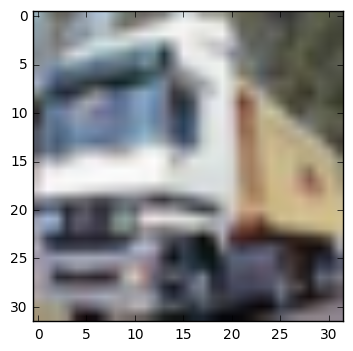

In [6]:
image_val, label_val = sess.run([image, label])
imshow(image_val.reshape([32, 32, 3]))
print label_val

In [7]:
meta = Meta()
meta.load('data/tfrecords_meta.json')
print meta.categories[label_val]

truck


In [8]:
coord.request_stop()
coord.join(threads)
sess.close()